['AD ROCK', 'ALIEN', 'ALIENS', 'ALL', 'AMAZONIAN', 'AMY', 'ANDERSON', 'ANNOUNCER', 'ANNOUNCER #1', 'ANNOUNCER #2', 'ARMY ROBOT', 'AUCTIONEER', 'BABE', 'BARKER', 'BEASTIE BOYS', 'BENDER', 'BENDER FIGURINE', 'BENDING UNIT', 'BIDDER #1', 'BIDDER #2', 'BIKE THIEF', 'BILL', 'BILLIONAIREBOT', 'BLUE ELDER', 'BOLT', 'BONT', 'BOOTH VOICE', 'BOY', 'BULLY', 'BUSH SR', 'CALCULON', 'CAMPAIGN MANAGER', 'CARTER', 'CHAIN SMOKER', 'CHAIR', 'CHANG', 'CHET', 'CHILD', 'CHRISSY', 'CLARK', 'CLEARCUTTER', 'CLINTON', 'COMMENTATOR', 'COMMISSIONER', 'COMPUTER VOICE', 'CONSTRUCTIONBOT', 'COSELL', 'COSMETOLOGIST', 'COUNTESS', 'COWBOY', 'CRACK ADDICT', 'CRATER FACE', 'CREWMAN', 'CROUPIER', 'CROW T', 'CROWD', 'CRUSHINATOR', 'DAISY MAE 128K', 'DECAPOD EMPEROR', 'DECAPOD MAN #1', 'DECAPOD MAN #2', 'DECAPOD MANM #1', 'DECAPOD WOMAN #1', 'DECAPOD WOMAN #2', 'DECAPOD WOMAN #3', 'DECAPODIAN WOMAN', 'DESTRUCTOR', 'DIXIE', 'DOCTORBOT', 'DOLE', 'DOLL', 'DOUBLEDEAL', 'DOUG', 'DWAYNE', 'EDNA', 'EINSTEIN', 'ELDERS', 'ELZAR', '

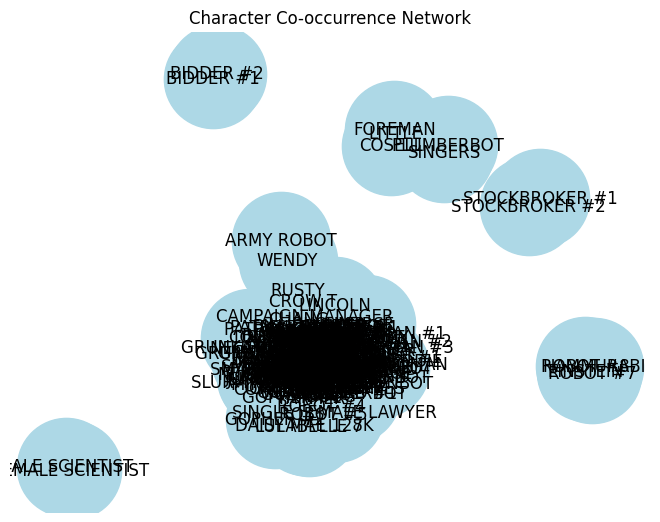

In [1]:
 #!pip install pandas
 #!pip install networkx
 #!pip install pyvis
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os


def readTextFiles(InputPath):
    # Extract characters in each scene
    scenes = []
    current_scene = set()
    count = 0
    # This function uses XPath to read the XML input
    for file in os.listdir(InputPath):
        if file.endswith('.xml'):
            if count > 20:
                break
            count += 1
            
            filepath = f"{InputPath}/{file}"
            # Parse XML
            root = ET.parse(filepath).getroot()
            
            for elem in root:
                if elem.tag == 'speak':
                    speaker = elem.attrib['who']
                    current_scene.add(speaker)
                elif elem.tag == 'info':
                    current_scene = set()
                    scenes.append(current_scene)
                # print(f"current scene: {current_scene}")
                # print(f"scenes at this point? {scenes}")
    return scenes

scenes = readTextFiles("./JNscripts-xml")

# Create a mapping between characters and indices
characters = sorted(set().union(*scenes))
character_indices = {character: i for i, character in enumerate(characters)}
print(characters)

# Initialize co-occurrence matrix
num_characters = len(characters)
co_occurrence_matrix = np.zeros((num_characters, num_characters), dtype=int)

# Update co-occurrence matrix
for scene in scenes:
    for character1 in scene:
        for character2 in scene:
            i = character_indices[character1]
            j = character_indices[character2]
            co_occurrence_matrix[i, j] += 1

# Print co-occurrence matrix
print(co_occurrence_matrix)

# Create a graph from the co-occurrence matrix
G = nx.Graph()
for i, character1 in enumerate(characters):
    for j, character2 in enumerate(characters):
        if i != j and co_occurrence_matrix[i, j] > 0:
            G.add_edge(character1, character2, weight=co_occurrence_matrix[i, j])

# Draw the graph
pos = nx.spring_layout(G, seed=578)  # Positions for all nodes
nx.draw(G, pos, node_size=5000, node_color='lightblue', font_size=10)

# Replace character indices with names
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the plot
plt.title("Character Co-occurrence Network")
plt.axis("off")
plt.show()

In [2]:
from pyvis.network import Network

# Create a Pyvis Network instance with increased height and width
net = Network(height="800px", width="100%", notebook=True, cdn_resources="in_line", select_menu=True)

# Create a dictionary to map node IDs to character names
node_labels = {node_id: character_name for node_id, character_name in enumerate(characters)}

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate edge betweenness centrality
edge_betweenness_centrality = nx.edge_betweenness_centrality(G, weight='weight')

# Add nodes with character labels
for node, centrality in degree_centrality.items():
    size = centrality * 100  # Scale the size based on degree centrality
    character_name = node_labels.get(node, str(node))  # Get the character name using the node ID or use node ID if not found
    net.add_node(node, size=size, label=character_name)  # Use character name as label

# Add edges with style based on edge-betweenness centrality
for edge, centrality in edge_betweenness_centrality.items():
    width = centrality * 10  # Scale the width based on edge-betweenness centrality
    net.add_edge(edge[0], edge[1], width=width, smooth=True)

# Enable physics simulation
net.force_atlas_2based()

# Show the network
net.show("network.html")

network.html
